# Part 1. Point Grids and Travel Time Calculations

### Creating the point grid.

The first part of the code creates the point grid for the state used. The spacings used was 0.02 degrees for all districts to ensure uniformity in grid size. It should be noted that Austin Jennings (the origin of this code) used are 0.075 degrees for statewide, 0.05 degree for large districts, and 0.01 for small districts. Degree size are changed in the 'by' variable.

After the point grid is created and clipped using ArcPro to the Congressional District shapefile, the points are fed through the Bing API to calculate travel times between each grid in 'seconds'. These times are then stored in a pickle file for use in Part 2.

,point_id,pts_lon,pts_lat,geometry
0,0,-91.513079,36.970298,POINT (-91.51307899999999 36.970298)
1,1,-91.493079,36.970298,POINT (-91.49307899999999 36.970298)
2,2,-91.473079,36.970298,POINT (-91.473079 36.970298)
3,3,-91.453079,36.970298,POINT (-91.453079 36.970298)
4,4,-91.433079,36.970298,POINT (-91.43307900000001 36.970298)
5,5,-91.413079,36.970298,POINT (-91.41307900000001 36.970298)
6,6,-91.393079,36.970298,POINT (-91.39307900000001 36.970298)
7,7,-91.373079,36.970298,POINT (-91.37307900000002 36.970298)
8,8,-91.353079,36.970298,POINT (-91.35307900000002 36.970298)
9,9,-91.333079,36.970298,POINT (-91.33307900000003 36.970298)


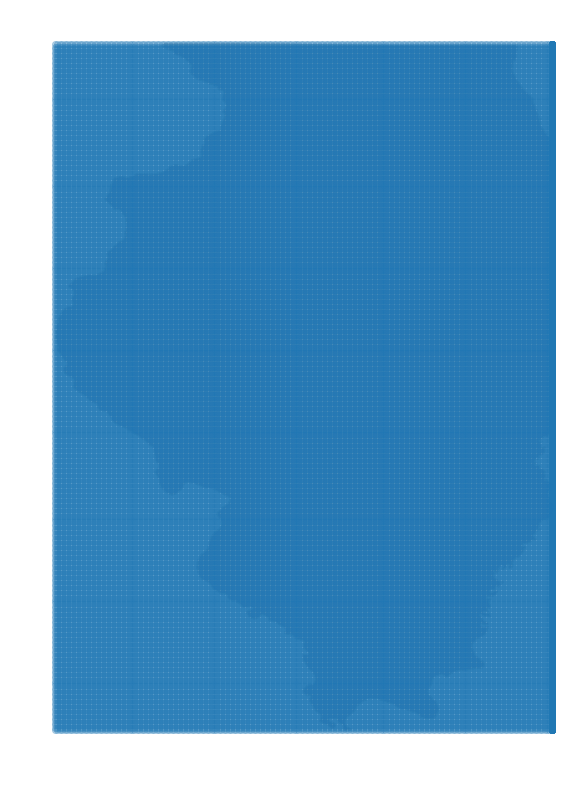

In [10]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
import matplotlib as mpl

# This sets Jupyter Notebook to the 'inline' backend.
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

# This sets keys and projections.
# '4326' is the WGS84 projection. Check http://spatialreference.org/ref/sr-org/?page=1 for different projections.
nan = 'np.nan'
bing_api_key = '#'
crs = {'init': 'epsg:4326'}

# This reads the state shapefile, and sets the state.
shp = 'Shapes/Illinois/cb_2017_State_IL.shp'
us = gpd.read_file(shp)
wa = us[us['STUSPS']=="IL"]

# Point Grid size. Use 0.075 for statewide, 0.05 for large districts, 0.01 for small districts.
by = 0.02

# This creates the pandas data frame for the points grid.
pts_grid = (
    pd.concat([pd.DataFrame({'pts_lon' : np.arange(float(wa.bounds['minx']), float(wa.bounds['maxx']), by)})
       , (pd.DataFrame({'pts_lat' : np.arange(float(wa.bounds['miny']), float(wa.bounds['maxy']), by)})
          .pivot(columns = 'pts_lat', values = 'pts_lat'))]
        , axis = 1
             )
    .replace(method='ffill')
    .replace(method='bfill')
    .melt(id_vars=['pts_lon'])
    .drop('variable', 1)
    .rename(columns = {'value' : 'pts_lat'})
    .reset_index()
    .rename(columns={"index": "point_id"})
            )

# This sets the latitude and longitude of the points, then puts them into a geodataframe.
geometry_pts = [Point(xy) for xy in zip(pts_grid.pts_lon, pts_grid.pts_lat)]
gdf_pts_grid = GeoDataFrame(pts_grid, crs=crs, geometry=geometry_pts)

# This creates the plot of the point grid, setting the color of the shapefile and the background.
wa_plot = wa.plot(color='#C4C9CE', edgecolor='white')

# This plots the point grid over the shapefile.
(gdf_pts_grid
    .plot(ax=wa_plot, alpha = .3)
    .set_axis_off())

# This saves the point grid as a shapefile. It also shows the table for the point grid.
gdf_pts_grid.to_file("Shapes/Illinois/0.02 grid/IL_grid.shp")
gdf_pts_grid

This is to ensure that the points were clipped correctly.

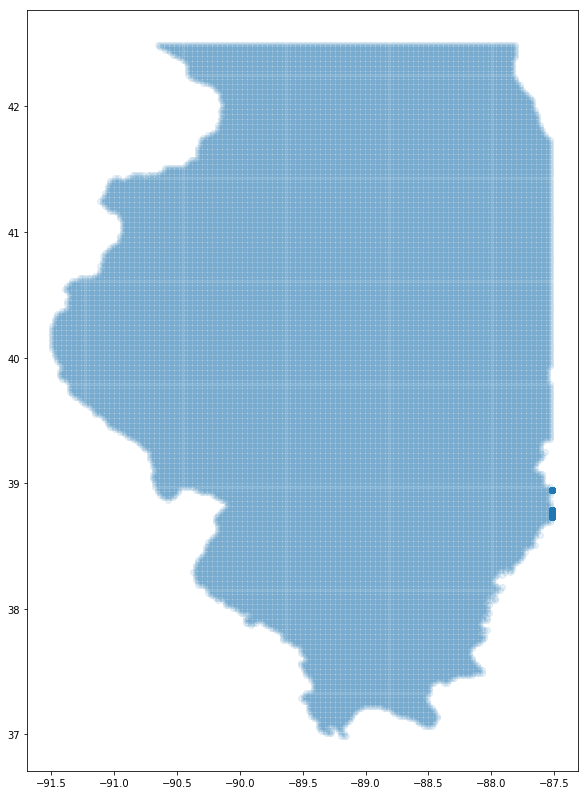

In [11]:
# This sets Jupyter Notebook to the 'inline' backend.
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

# This pulls in the shapefile of the points after clipping them in ArcPro.
pts = 'Shapes/Illinois/IL_grid_clip.shp'

# This reads the shapefile with geopandas, then plots it.
wa_pt_grid = gpd.read_file(pts)
wa_pt_grid.plot(alpha = .1)

### Calculating Travel Time and Populating the Matrix

"A distance matrix is comprised of a table of N by N dimensions. Each row and column of the cell value contains a 'similarity' between the heading and index (the first row and column) values. Travel times are used between each combination of points as the similarity, instead of the typical euclidean distances. This will be utilized in the Multidimensional Scaling script further on.

One important note: if the heading row and the index column are identical, then row 'X' and column 'Y' will have the same value as row 'Y' column 'X'. This symmetry can be used to reduce the number of geocoding requests that need to be made. This is used with the itertools library function called combinations. This function looks at a list of values and returns the second list of all possible unique combinations that exist within that list.

The Bing API is used below to build the distance matrix for a clipped district shapefile." (Jennings). The code was modified to allow for a work around to the Bing API limit of 50,000 requests in any 24 hour period by getting the first 49,000 points, then resting for 24 hours, then repeating till complete.

In [13]:
from itertools import combinations
from random import randint
import json
from requests.exceptions import HTTPError
from urllib.error import URLError
import simplejson
import urllib
from datetime import datetime
from decimal import Decimal
from arcgis.features import SpatialDataFrame
import pickle
import geopandas as gpd
import pandas as pd
from arcgis import GIS
import time

# This pulls the grid shapefiles for the congressional district and reads the file in geopandas.
file = 'Shapes/Pennsylvania/0.02 grid/PA_7_grid_2_clip.shp'
CDgrid = gpd.read_file(file)

# This zips the lat/long into a single column.
CDgrid['lat,long'] = list(zip(CDgrid.pts_lat, CDgrid.pts_lon))

# This creates a list of all coordinates so it can be writen to NxN matrix.
xytups = CDgrid['lat,long'].tolist()

# This finds all the unique combinations of list entries. It them removes duplicate geocoding.
# This does assume that the travel time from A to B is equal to B to A.
unicombos = [comb for comb in combinations(xytups, 2)]  

# This shows how many points, unique combinations, and possible combinations for the shapefile.
pointcount = len(xytups)
totalcombinations = len(xytups)*len(xytups)
print('The amount of points in the shapefile is: ', pointcount)
print('The amount of unique combinations is: ', len(unicombos)) 
print('The total possible combinations for the shapefile is: ',totalcombinations)

# This creates the similarity matrix of n by n points.
dmatrix = pd.DataFrame(index = xytups, columns = xytups)
dmatrix

# This utilizes the Bing API to populate the matrix and sets up the counter for the Bing API.
length = len(unicombos)
key =''
n = 0

# This goes through 49,000 points, then rests for 24 hours. 
for i in range(length):
    if n<49000:
        try:
            # This selects the target coordinate pairs in each unique tuple (origin, destination).
            origtup = unicombos[i][0]
            desttup = unicombos[i][1]

            # This selects the x and y coordinates for each of the pairs in the unique tuple.
            origx = unicombos[i][0][0]
            origy = unicombos[i][0][1]    
            destx = unicombos[i][1][0]
            desty = unicombos[i][1][1]

            # This casts coordinates to string for the API.    
            strox = str(origx)
            stroy = str(origy)
            strdx = str(destx)
            strdy = str(desty)

            # This calculates the travel times in seconds.
            # ttime = randint(1000,9999)
            url = 'http://dev.virtualearth.net/REST/V1/Routes/Driving?wp.0=' + strox + ',' + stroy + '&wp.1=' + strdx + ',' + strdy + '&key=' + key
            request = urllib.request.Request(url)
            response = urllib.request.urlopen(request)
        
            r = response.read().decode(encoding="utf-8")
            result = json.loads(r)
            ttime = (result["resourceSets"][0]["resources"][0]["travelDurationTraffic"])

            # This populates the matrix.
            dmatrix.loc[origtup, desttup]= ttime
            dmatrix.loc[desttup, origtup]= ttime
            # Setting travel time between identical points to 0, but MDS doesn't like zeros. 
            # This is easy to replace, just need to figure out what to replace with.
            dmatrix.loc[origtup, origtup]= 0 
            # This tries to catch the last NaN.
            if i == length:
                dmatrix.loc[desttup, desttup] = 0
            print(i)
            n=n+1
        # This catches the errors that occured during processing.
        except TimeoutError:
            print('sleep 1 minute')
            time.sleep(60)
            continue
        except HTTPError:
            ttime = Decimal('nan')
        except URLError:
            ttime = Decimal('nan')
    
    # This runs for 49,000 times, then sleeps for 24 hours before repeating the process.
    else:
        print('Sleep 24 hours')
        time.sleep(86400)
        n=0

# This converts the matrix into a pickle file.
dmatrix.to_pickle('Shapes/Pennsylvania/0.02 grid/PA_7_grid_2_clip.pkl')
print('Process completed for '+ file)

The amount of points in the shapefile is:  42
The amount of unique combinations is:  861
The total possible combinations for the shapefile is:  1764
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
2

In [ ]:
# This prints the matrix from above in order to assure there are no NaN values.
dmatrix